## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read csv file 
df = pd.read_csv('ab_data.csv')
# print the first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# print the number of rows. 
print(f'Number of rows is: {df.shape[0]}.')

Number of rows is: 294478.


c. The number of unique users in the dataset.

In [4]:
# print the number of unique users.
print(f'Number of unique users is: {df.user_id.nunique()}.')

Number of unique users is: 290584.


d. The proportion of users converted.

In [5]:
# print the proportion of users converted.
print(f'Proportion of users converted is: {df.converted.mean()}.')

# print round of proportion of users converted.
print(f'Round of proportion of users converted is: {round(df.converted.mean() , 2)}.')

# print percentage of proportion of users converted.
print(f'Percentage of proportion of users converted is: {round(df.converted.mean(),2) * 100} %.')


Proportion of users converted is: 0.11965919355605512.
Round of proportion of users converted is: 0.12.
Percentage of proportion of users converted is: 12.0 %.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# the number of times the landing_page is new_page and group is not treatment
NewPage_Not_treatment = df.query('landing_page == "new_page" & group != "treatment"')

#print(NewPage_Not_treatment.shape[0])


# the number of times the landing_page is not new_page and group is treatment
treatment_Not_NewPage =  df.query('landing_page != "new_page" & group == "treatment"')

#print(treatment_Not_NewPage.shape[0])

# print The number of times the new_page and treatment don't line up.
print(f'Number of times the new_page and treatment do not line up is: {NewPage_Not_treatment.shape[0] + treatment_Not_NewPage.shape[0]}.')


Number of times the new_page and treatment do not line up is: 3893.


f. Do any of the rows have missing values?

In [7]:
# caculate missing or null values
print(df.isnull().sum()) 

#print(df.info())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


**No missing values**


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# first drop data where treatment is not aligned with new_page from df and store in new dataframe df1
df1 = df.drop(df[(df.group =="treatment") & (df.landing_page != "new_page")].index)


# Now drop data where control is not aligned with old_page from df1 and store in new dataframe df2
df2 = df1.drop(df1[(df1.group =="control") & (df1.landing_page != "old_page")].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# print the number of unique users
print(f'Number of unique users is: {df2.user_id.nunique()}.')

Number of unique users is: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# find the user_id repeated in dataset
repeated = df2[df2.user_id.duplicated()]
repeated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**USER ID repeated is 773192 and repeate with index 1889 and 2893.**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Now drow repeate user_id with index 2893
df2.drop(labels = 2893, inplace=True)

# check that drop done and no repeated
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# print the probability of an individual converting regardless of the page they receive
print(df2.converted.mean())

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# print the probability they converted when individual was in the control group
print(df2.query('group == "control"').converted.mean())


0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# print the probability they converted when individual was in the treatment group
print(df2.query('group == "treatment"').converted.mean())

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
# print the probability that an individual received the new page
print((df2['landing_page'] == "new_page").mean())

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** 

From the results we can see that the probability they converted when individual was in the **control** group is **0.120** and **this result is very close from**  the probability they converted when individual was in the **treatment** group is **0.1188** and the individual received the new page regardless **treatment** group or **control** group is **same 0.5** 

**so: there is no sufficient evidence to say that the new treatment page leads to more conversions.**



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


null hypotheses : p_new - p_old <= 0

alternative hypotheses : p_new - p_old > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# find the convert rate for  𝑝𝑛𝑒𝑤  under the null
P_new = df2.converted.mean()
print(P_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# find convert rate for  𝑝𝑜𝑙𝑑  under the null?
P_old = df2.converted.mean()
print(P_old)

0.11959708724499628


c. What is $n_{new}$?

In [20]:
# use query to count users who has new_page 
N_new = df2.query('landing_page == "new_page"').shape[0]
print(N_new)

145310


d. What is $n_{old}$?

In [21]:
# use query to count users who has old_page 
N_old = df2.query('landing_page == "old_page"').shape[0]
print(N_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# use choice function from random lib to Simulate  𝑛𝑛𝑒𝑤  transactions with a convert rate of  𝑝𝑛𝑒𝑤  under the null. Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.
new_conv = np.random.choice([1, 0], size=N_new, p=[P_new, (1-P_new)]).mean()
print(new_conv)



0.12041153396187461


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# use choice function from random lib to Simulate  𝑛𝑜𝑙𝑑  transactions with a convert rate of  𝑝𝑜𝑙𝑑  under the null. Store these  𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.
old_conv = np.random.choice([1, 0], size = N_old, p=[P_old, (1-P_old)]).mean()
print(old_conv)


0.11902336274901221


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_conv - old_conv

0.0013881712128624019

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# creat list P_diffs to Store all 10,000 values.
P_diffs = []
# make for loop to Simulate 10,000 time
for _ in range(10000):
    
    new_page_conv = np.random.choice([1, 0], size=N_new, replace = True, p=[P_new, 1 - P_new]).mean()
    old_page_conv = np.random.choice([1, 0], size=N_old, replace = True, p=[P_old, 1 - P_old]).mean()
    # append all 10,000 values in list p_diffs.
    P_diffs.append(new_page_conv - old_page_conv)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
# check len of list is equal 10000
len(P_diffs)

10000

Text(0.5, 0, 'p_diffs')

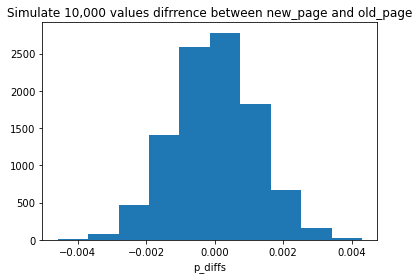

In [27]:
# create an array from list p_diffs
p_diffs = np.array(P_diffs)
# use histogram plot to show p_diffs
plt.hist(p_diffs)
# name title of plot
plt.title("Simulate 10,000 values difrrence between new_page and old_page")
# xlabel name
plt.xlabel("p_diffs")

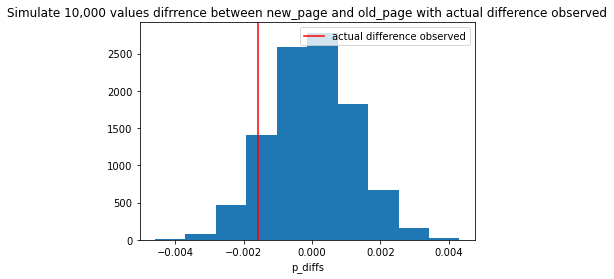

In [28]:
# make histogram plot of p_diffs
plt.hist(p_diffs)

# calculate actual difference observed
act_diffs_obs = (df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean())

# name title of plot
plt.title("Simulate 10,000 values difrrence between new_page and old_page with actual difference observed")
# xlabel name
plt.xlabel("p_diffs")

# use axvline function to make a vertical line of actual difference observed a cross the p_diffs axes
plt.axvline(act_diffs_obs, color='red', label = "actual difference observed")

# use legend to show leabel
plt.legend()

#show plot
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# calc the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > act_diffs_obs).mean()

0.9041

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
the value computed in part j is **P value** as we can see that the our p value is equal 0.9074 and this means that our p value is greater than significance level 
**so:  we fail to reject the null hypothesis.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
# count rows of old_page and converted
convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]

# count rows of new_page and converted
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]

# count rows of old_page
n_old = df2.query('landing_page == "old_page"').shape[0]

# count rows of new_page
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# calc Z_score and P_value using stats.proportions_ztest
Z_score, P_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
Z_score, P_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** from part m we can see that z-score is equal 1.3109 The critical Z-Score values is a 95% confidence level,because our Z score is between -1.96 and +1.96, our p-value is  larger than 0.05, so we cannot reject your null hypothesis. and this agree with part j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer: Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#  Add an intercept column.
df2['intercept'] = 1
# Creat dummy column
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
# show head of df2
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
# create a model and fit with intercept and ab_page columns
model = sm.Logit(df2.converted, df2[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
#show summary of model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        08:10:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

as we can see that the p value 0.190 this values is greater than 0.05 so we also fail to reject the null hypothesis.
but this value is lower than p value in  Part II because we added intercept column and Logistic Regression is based on a two tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

it is a good idea to add more additional factors because the current factors not able to show whether the user converted or not clearly we can add factor like work day or holiday , gender or age to enhance the results

the disadvantages is make  model more difficult and more complicated 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# show head of df_new
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
# find countries in dataset
print(df_new.country.unique())

['UK' 'US' 'CA']


In [37]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results
model = sm.Logit(df_new.converted, df_new[['intercept','ab_page','UK','US']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:               2.323e-05
Time:                        08:10:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The p-values for the countries UK and US is greater than 0.05, so again we fail reject the null hypothesis. Countries do not influence significantly differences in the conversion rates.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

### Resources
https://statisticsbyjim.com/hypothesis-testing/failing-reject-null-hypothesis/

https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/

https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/

https://stackoverflow.com/questions/21566744/generate-random-array-of-0-and-1-with-a-specific-ratio

https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm

https://www.youtube.com/watch?v=zTABmVSAtT0

https://askanydifference.com/difference-between-z-test-and-p-value/